In [2]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
%load_ext autoreload
%autoreload 2
from skimage.metrics import structural_similarity as ssim


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 1.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [4]:
import os
def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

In [5]:

np.random.seed(0)

x = np.array(Image.open('../../testset/10081.jpg'))/255.
# x = np.array(Image.open('../../testset/12003.jpg'))/255.

rows,cols,_ = np.shape(x)
delta= 0.05
# print(np.random.normal(0,1,x.shape).shape)
z = x+ delta*np.random.normal(0,1,x.shape)



In [41]:

## Without GGS
slpam_at_solver = DMS(
        norm_type="AT",
        edges="similar",
        beta=2,
        lamb=1e-3,
        eps=0.2,
        stop_criterion=1e-4,
        MaximumIteration=30,
        method="SLPAM-eps-descent",
        noised_image_input=z,
        optD="OptD",
        dk_SLPAM_factor=1e-4,
        eps_AT_min=0.02,
        A=np.ones((rows,cols)))

palm_at_descent_solver = DMS(
        norm_type="AT",
        edges="similar",
        beta=3,
        lamb=5e-3,
        eps=0.1,
        stop_criterion=1e-4,
        MaximumIteration=200,
        method="PALM-eps-descent",
        noised_image_input=z,
        optD="OptD",
        eps_AT_min=0.01,
        A=np.ones((rows,cols)))

palm_at_fixed_solver = DMS(
        norm_type="AT",
        edges="similar",
        beta=3,
        lamb=5e-3,
        eps=0.01,
        stop_criterion=1e-4,
        MaximumIteration=250,
        method="PALM",
        noised_image_input=z,
        optD="OptD",
        eps_AT_min=0.02,
        A=np.ones((rows,cols)))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


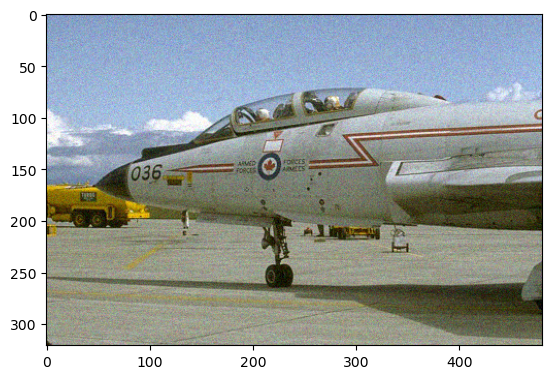

Epsilon:  0.1


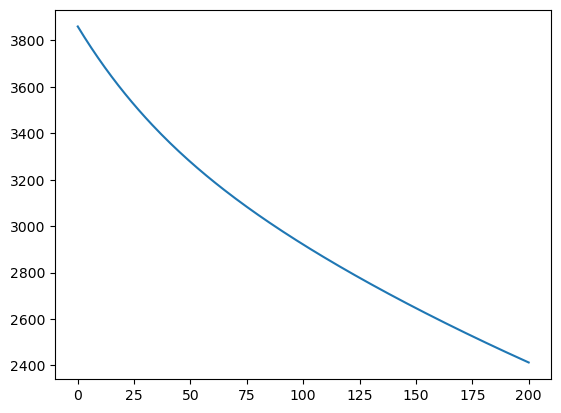

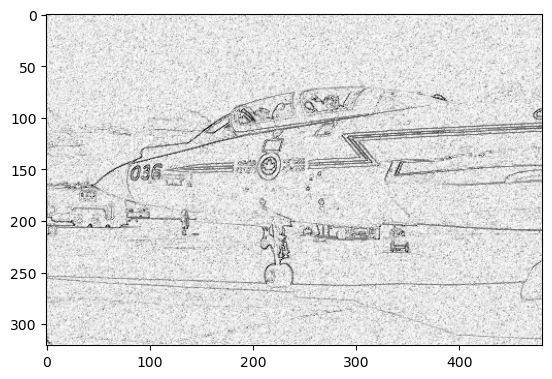

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


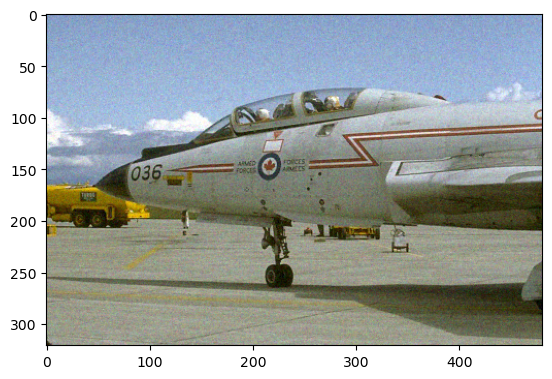

Epsilon:  0.06666666666666667


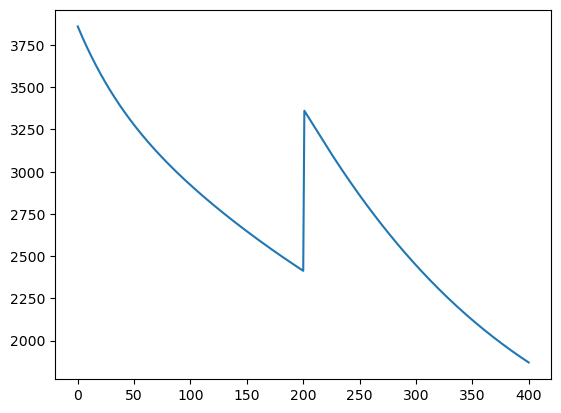

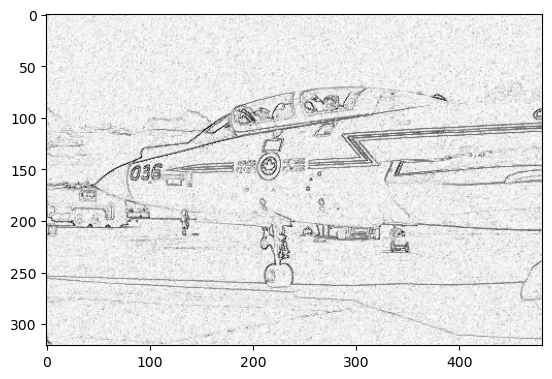

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


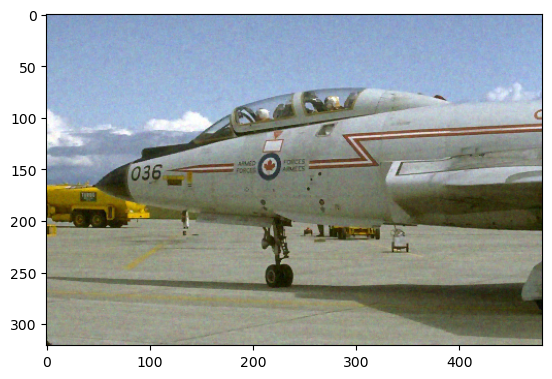

Epsilon:  0.044444444444444446


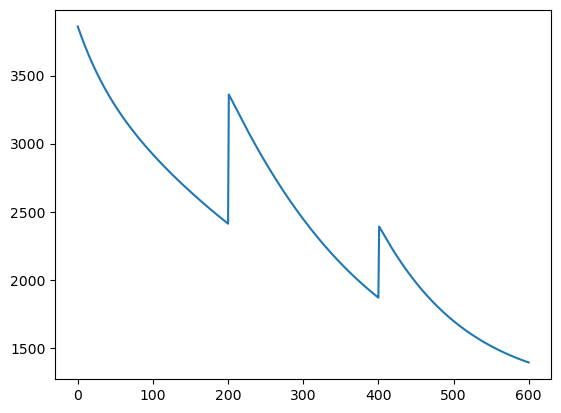

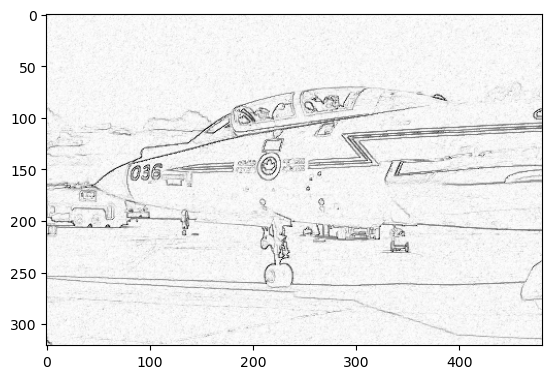

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


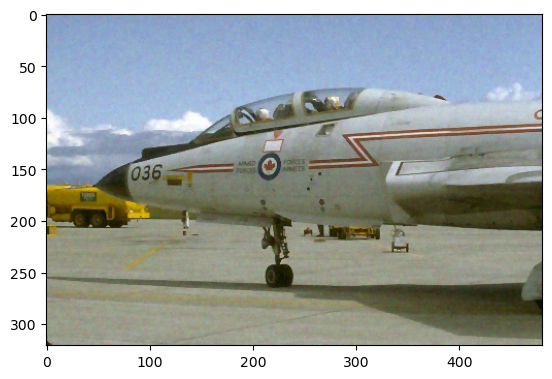

Epsilon:  0.02962962962962963


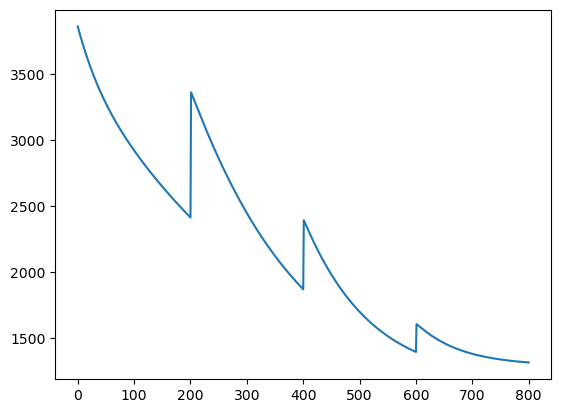

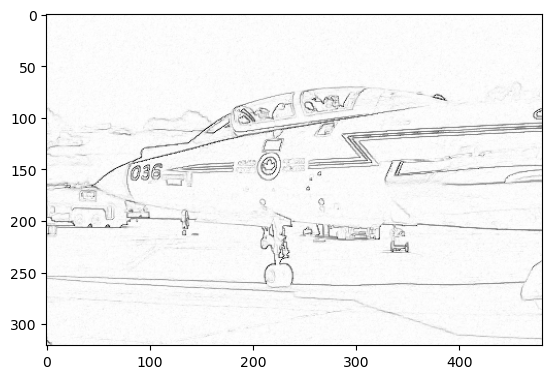

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


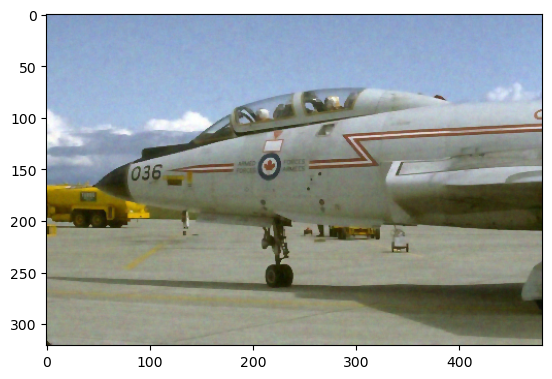

Epsilon:  0.019753086419753086


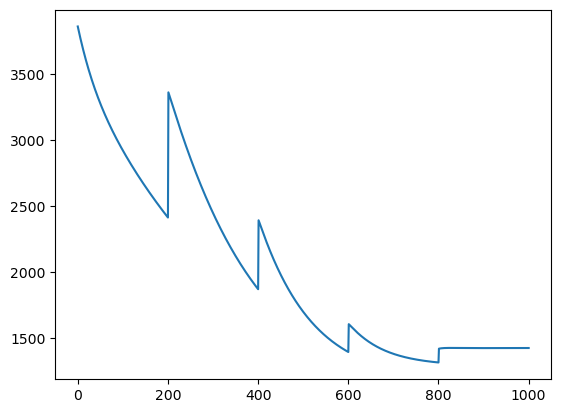

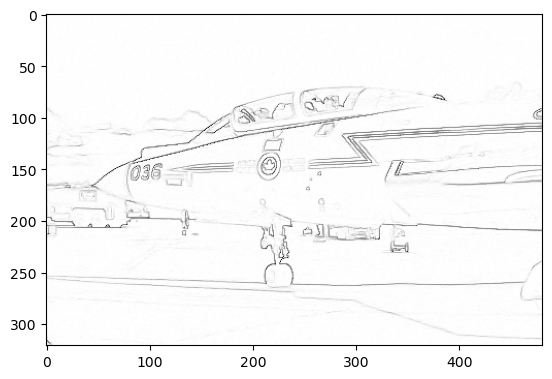

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


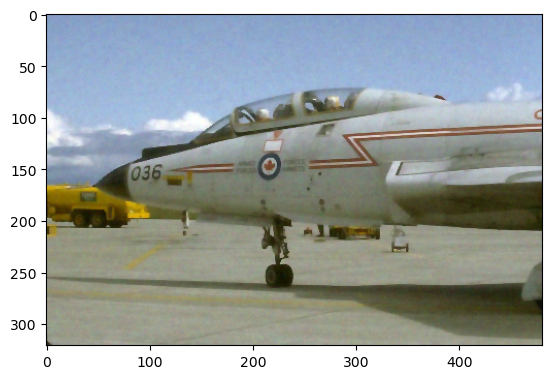

Epsilon:  0.01316872427983539


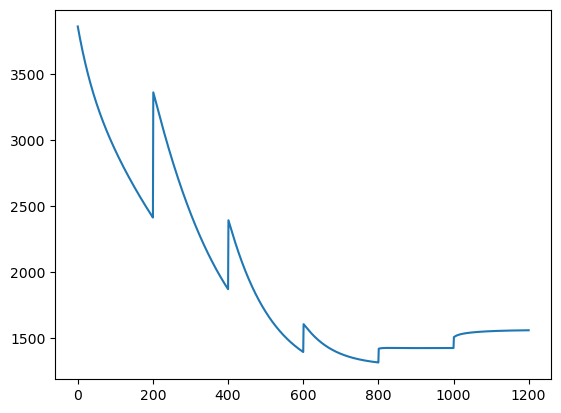

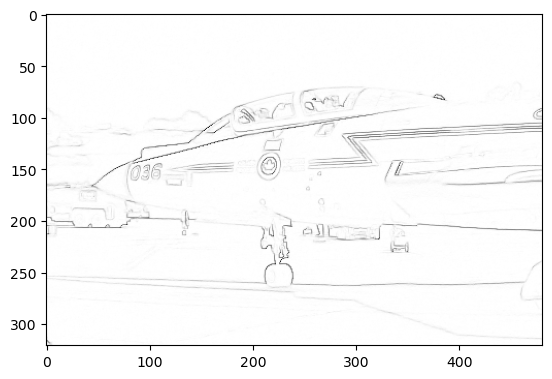

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


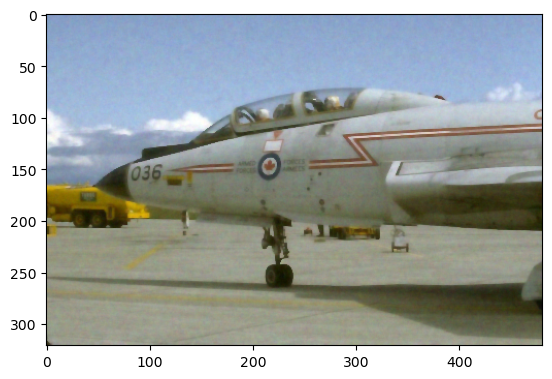

In [42]:
plt.figure()
plt.imshow(z)
plt.show()

time2 = time.time()
out_palm_at_descent_solver = palm_at_descent_solver.process()
time_palm_at= time.time()-time2

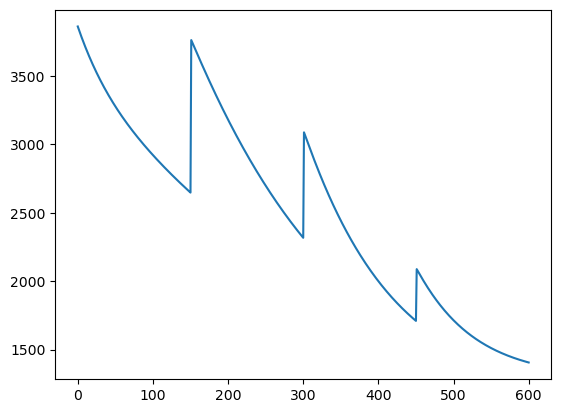

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


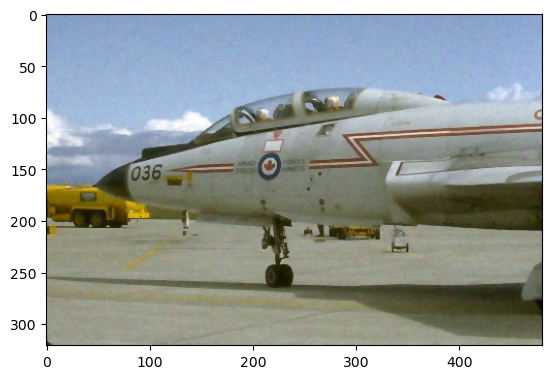

In [38]:
plt.figure()
plt.plot(out_palm_at_descent_solver[2])
plt.show()
plt.figure()
plt.imshow(out_palm_at_descent_solver[1])
plt.show()

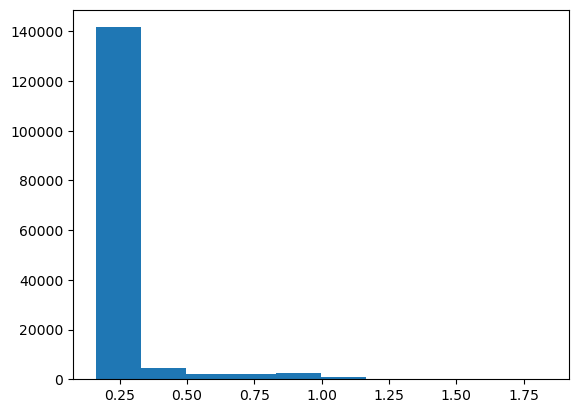

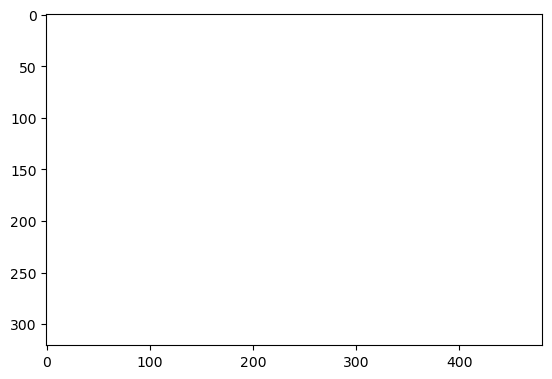

In [40]:
edge = out_palm_at_descent_solver[4][3][:,:,0]+out_palm_at_descent_solver[4][3][:,:,1]
plt.figure()
plt.hist(edge.flatten())
plt.show()
plt.figure()
plt.imshow(edge>0.03,cmap='gray_r')
plt.show()

In [34]:
np.max(out_palm_at_descent_solver[4][4][:,:,0])

0.8401624575762106

In [ ]:
plt.figure()
plt.imshow(z)
plt.show()

time2 = time.time()
out_palm_at_fixed_solver = palm_at_fixed_solver.process()
time_palm_at= time.time()-time2

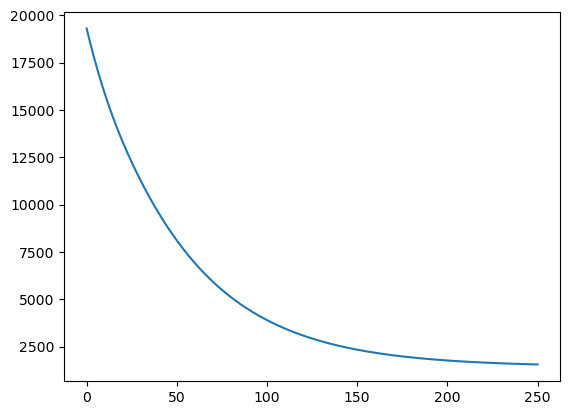

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


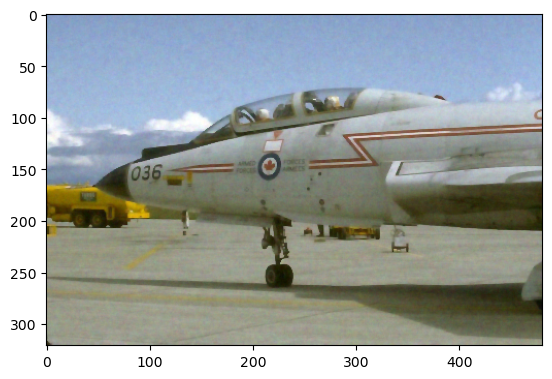

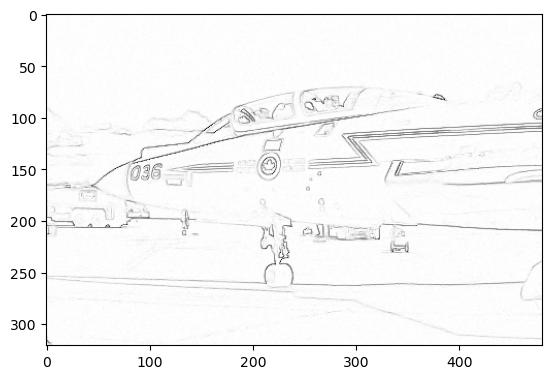

In [17]:
plt.figure()
plt.plot(out_palm_at_fixed_solver[2])
plt.show()
plt.figure()
plt.imshow(out_palm_at_fixed_solver[1])
plt.show()
plt.figure()
plt.imshow(out_palm_at_fixed_solver[0][:,:,0]+out_palm_at_fixed_solver[0][:,:,1],cmap='gray_r')
plt.show()

In [ ]:
round,_,_,_=np.shape(out_palm_at[4])

In [ ]:
plt.figure(figsize=(20,10))
e1 = out_palm_at[4][round-1][:,:,0]+out_palm_at[4][round-1][:,:,1]
x1 = out_palm_at[3][round-1]
x=np.copy(x1)
for i in range(rows):
    # Loop through each column
    for j in range(cols):
        # If the column index is greater than the row index, it's an element in the upper diagonal
        if j > i*(481/321):
            x[i,j,0]=1-e1[i,j]/2
            x[i,j,1]=1-e1[i,j]/2
            x[i,j,2]=1-e1[i,j]/2
plt.imshow(x)
# plt.axis('off')
# plt.savefig('x_est_eps_0.png', bbox_inches='tight', pad_inches=0)
# plt.show()
